In [1]:
from matplotlib import pyplot as plt
from skimage import color
import numpy as np
import cv2 as cv

from face_detection.process.light import compensate_light
from face_detection.process.color_space import transform as transform_color
from face_detection.segment.skin import ycbcr_segment_skin
from face_detection.detect.skin import detect as detect_skin
from face_detection.detect import eye_mouth

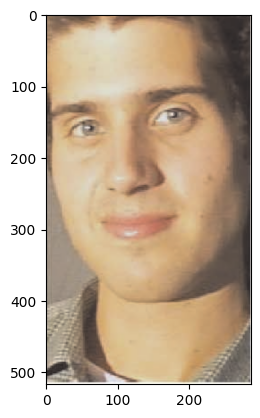

In [16]:
bgr = cv.imread('visualization/face.png')
rgb = cv.cvtColor(bgr, cv.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

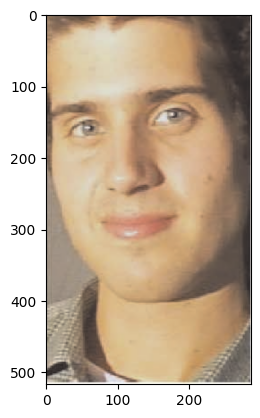

In [3]:
compensated_rgb = compensate_light(rgb)
plt.imshow(compensated_rgb)
plt.show()

48.20158823529412 134.5060803606754 234.3000588235294


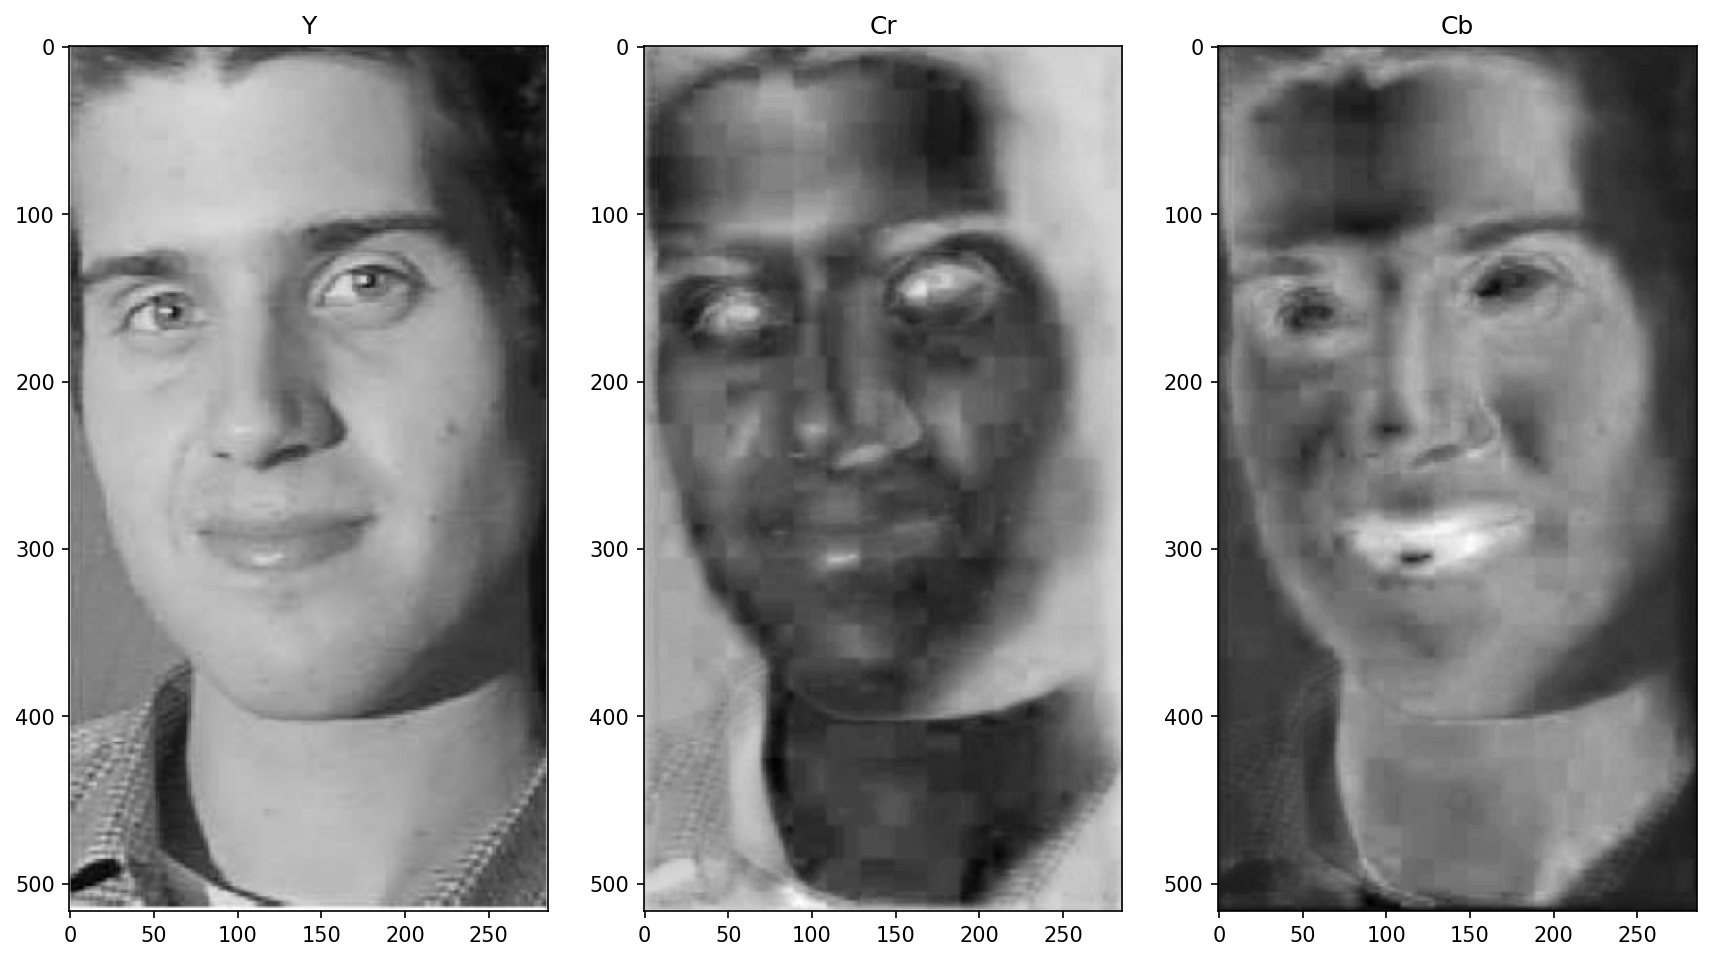

In [4]:
ycbcr = color.rgb2ycbcr(compensated_rgb)
print(ycbcr.min(), ycbcr.mean(), ycbcr.max())
plt.figure(figsize=(14, 10), dpi=150, frameon=True)
plt.subplot(131, title='Y').imshow(ycbcr[...,0], 'gray')
plt.subplot(132, title='Cr').imshow(ycbcr[...,1], 'gray')
plt.subplot(133, title='Cb').imshow(ycbcr[...,2], 'gray')
plt.show()

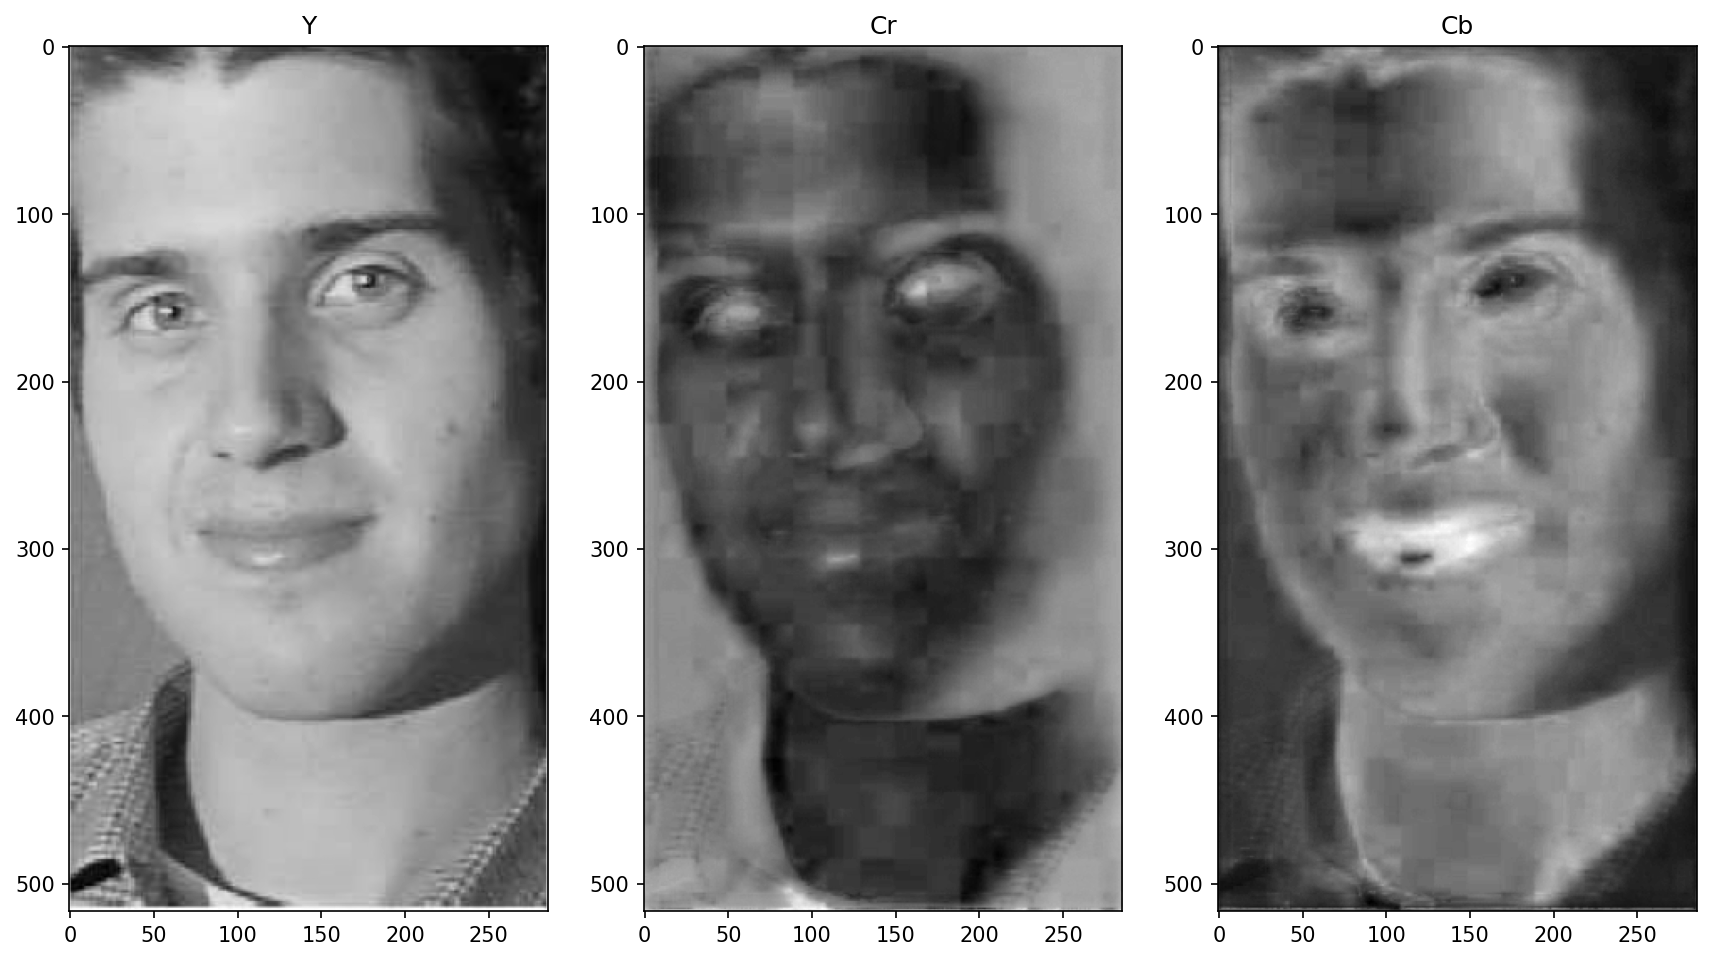

In [5]:
transformed_ycbcr = transform_color(ycbcr)
plt.figure(figsize=(14, 10), dpi=150, frameon=True)
plt.subplot(131, title='Y').imshow(transformed_ycbcr[...,0], 'gray')
plt.subplot(132, title='Cr').imshow(transformed_ycbcr[...,1], 'gray')
plt.subplot(133, title='Cb').imshow(transformed_ycbcr[...,2], 'gray')
plt.show()

(517, 286, 3)


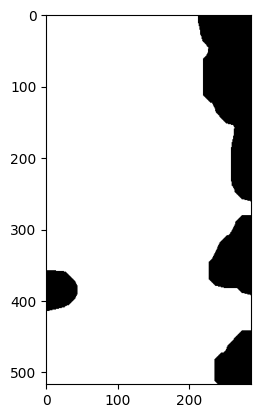

In [6]:
skin_mask = ycbcr_segment_skin(transformed_ycbcr)
plt.imshow(skin_mask, 'gray')
plt.show()

In [7]:
l,t,w,h = skin_rect = detect_skin(skin_mask)
skin_rect

Rect(left=0, top=0, width=286, height=517)

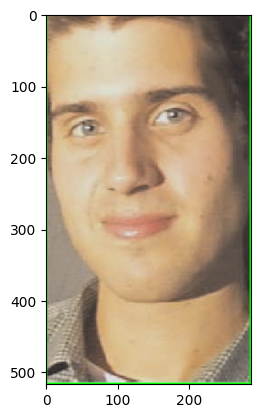

In [8]:
skin_detection = cv.rectangle(rgb.copy(), skin_rect, (0,255,0), 2)
plt.imshow(skin_detection)
plt.show()

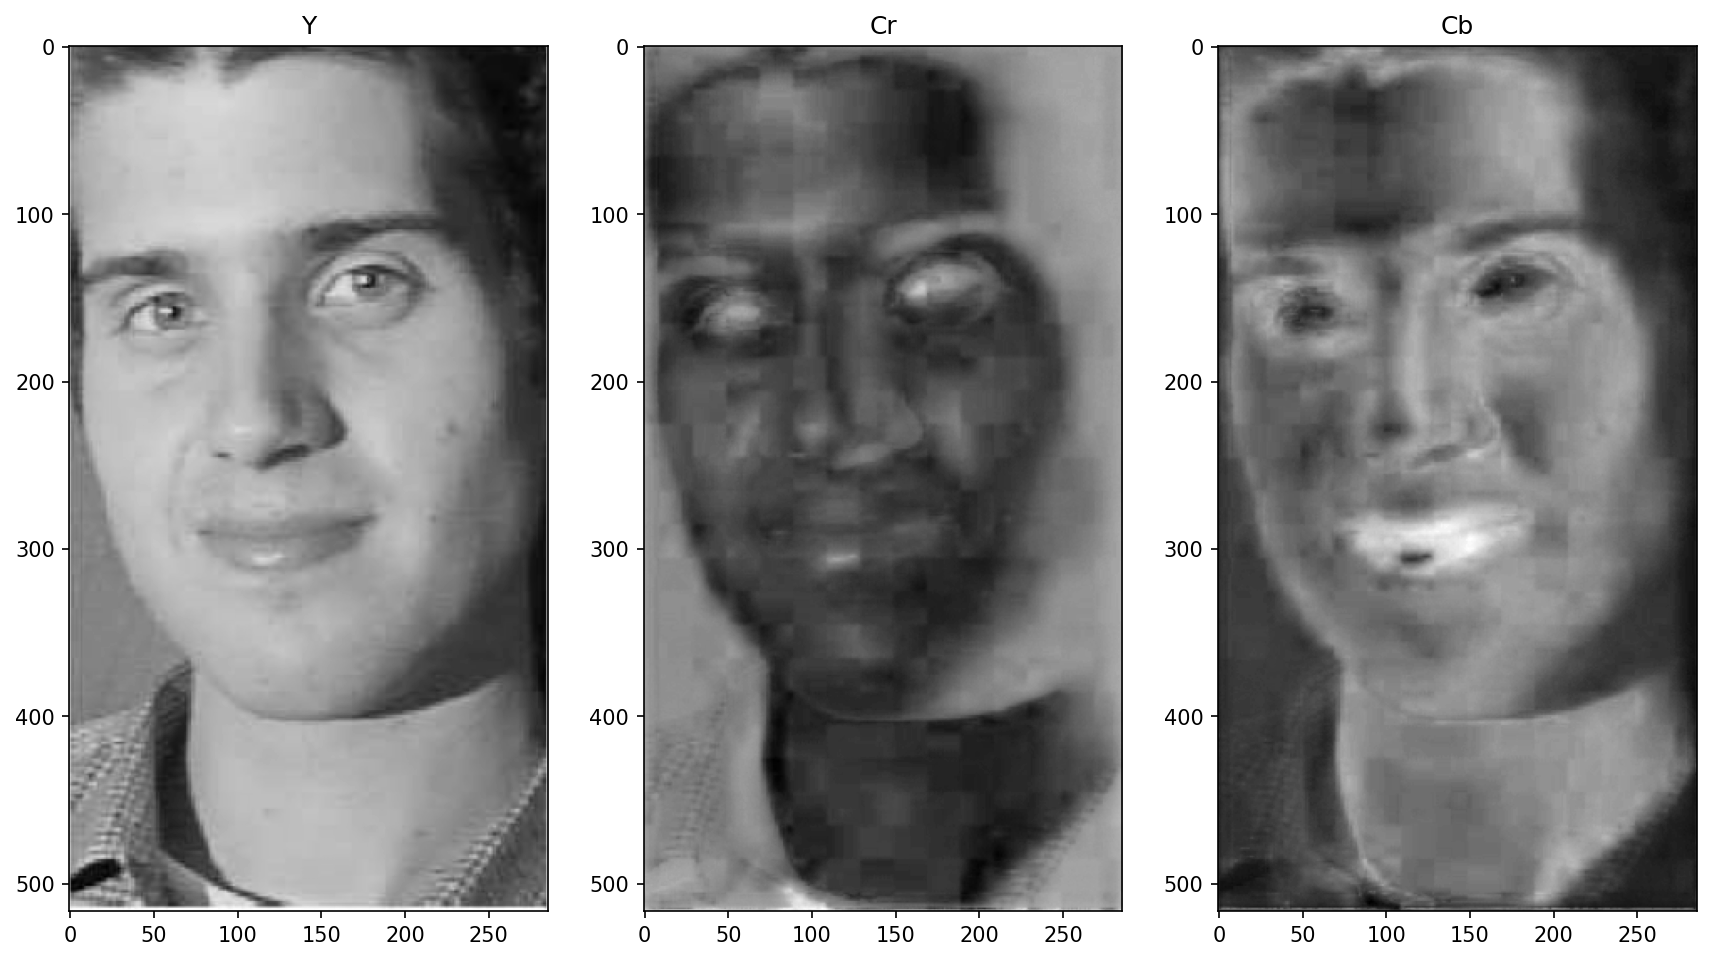

In [9]:
segmented_ycbcr = transformed_ycbcr.copy()
plt.figure(figsize=(14, 10), dpi=150, frameon=True)
plt.subplot(131, title='Y').imshow(segmented_ycbcr[...,0], 'gray')
plt.subplot(132, title='Cr').imshow(segmented_ycbcr[...,1], 'gray')
plt.subplot(133, title='Cb').imshow(segmented_ycbcr[...,2], 'gray')
plt.show()

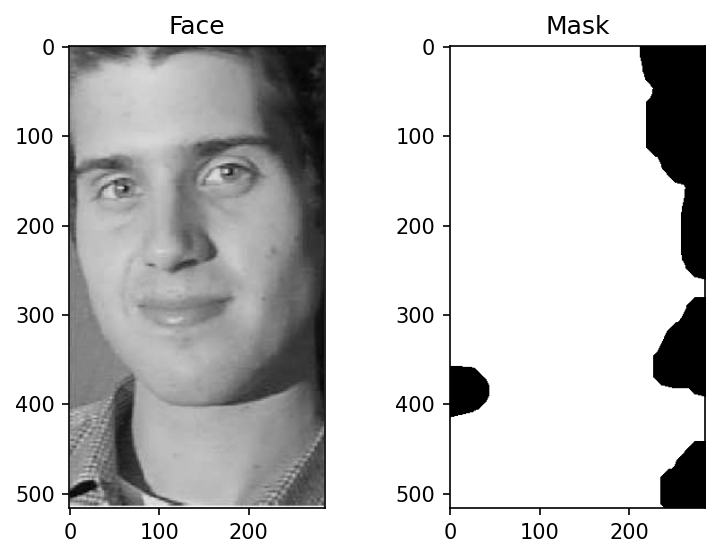

In [10]:
face_ycbcr = segmented_ycbcr[t:t+h, l:l+w]
face_mask = skin_mask[t:t+h, l:l+w]
plt.figure(figsize=(6, 4), dpi=150, frameon=True)
plt.subplot(121, title='Face').imshow(face_ycbcr[..., 0], 'gray')
plt.subplot(122, title='Mask').imshow(face_mask, 'gray')
plt.show()

6.024238782051282 7.961939102564102


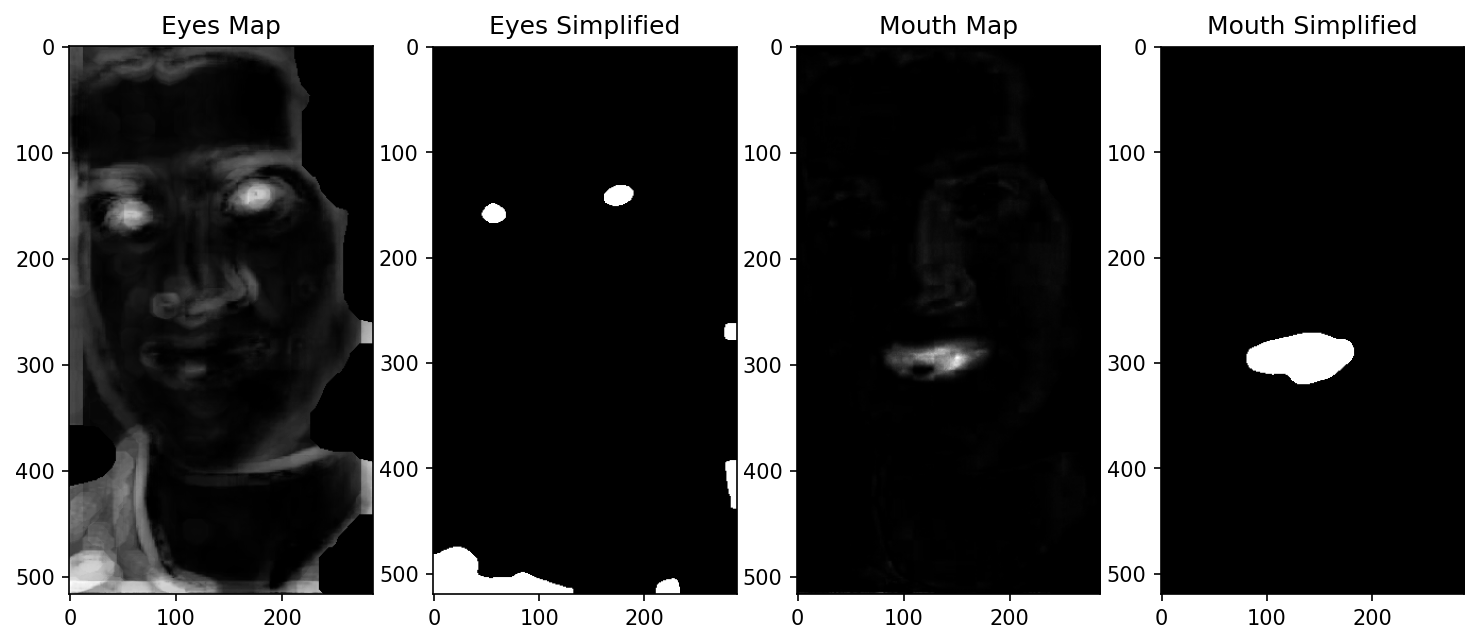

In [17]:
eyes = eye_mouth.eye_map(face_ycbcr)
mouth = eye_mouth.mouth_map(face_ycbcr)

eyes[face_mask == 0] = 0
mouth[face_mask == 0] = 0

eyes_base = eyes.copy()
mouth_base = mouth.copy()

eyes = eye_mouth.simplify_eye_map(eyes)
mouth = eye_mouth.simplify_mouth_map(mouth)


print(mouth.mean(), eyes.mean())

plt.figure(figsize=(12, 6), dpi=150, frameon=True)
plt.subplot(141, title='Eyes Map').imshow(eyes_base, 'gray')
plt.subplot(142, title='Eyes Simplified').imshow(eyes, 'gray')
plt.subplot(143, title='Mouth Map').imshow(mouth_base, 'gray')
plt.subplot(144, title='Mouth Simplified').imshow(mouth, 'gray')
plt.show()

In [12]:
eyes_det = eye_mouth.detector.detect(eyes)
mouth_det = eye_mouth.detector.detect(mouth)
eyes_det, mouth_det

((< cv2.KeyPoint 0x7f896460f9f0>,
  < cv2.KeyPoint 0x7f8964507630>,
  < cv2.KeyPoint 0x7f8964507000>,
  < cv2.KeyPoint 0x7f896437bf90>),
 (< cv2.KeyPoint 0x7f896437bd20>,))

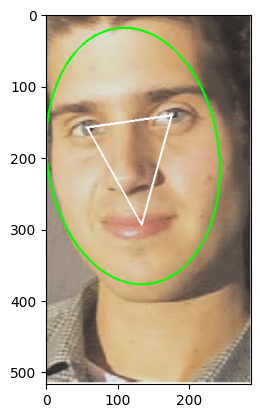

In [15]:
canvas = rgb[t:t+h, l:l+w].copy()
for face in eye_mouth.filter_detections(face_ycbcr, eyes_det, mouth_det):
  face.draw(canvas)
plt.imshow(canvas)